<center><img src="https://matplotlib.org/_static/logo2.png" width=600 alt="Matplotlib Logo"></img></center>

# Additional Topics Part 1: Histograms, Pie Charts, and Animation

---
## Overview

1. Histograms
1. Pie Charts
1. Animation

## Prerequisites
| Concepts | Importance | Notes |
| --- | --- | --- |
| [NumPy basics](../numpy/numpy-basics) | Necessary | |
| [Matplotlib basics](./matplotlib) | Necessary | |

* **Time to Learn**: 30 minutes

---

## Imports

The same as before, we are going to import matplotlib's `pyplot` interface as `plt`.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Histograms


To make a 1D histogram, we're going to generate a single vector of numbers.

We'll generate these numbers using NumPy's normal distribution random number generator. For demonstration purposes, we've specified the random seed for reproducability.

In [2]:
npts = 2500
nbins = 15

np.random.seed(0)
x = np.random.normal(size=npts)

Finally, make a histogtam using `plt.hist`. Here, specifying `density=True` changes the y-axis to be probability instead of count. 

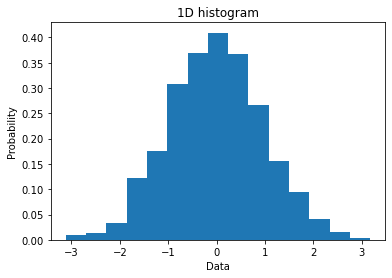

In [3]:
plt.hist(x, bins=nbins, density=True)
plt.title('1D histogram')
plt.xlabel('Data')
plt.ylabel('Probability');

Similarly, we can make a 2D histrogram by generating a second random array and using `plt.hist2d`.

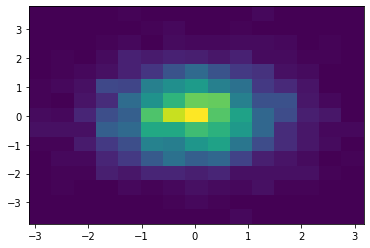

In [4]:
y = np.random.normal(size=npts)

plt.hist2d(x, y, bins=nbins);

## Pie Charts

Matplotlib can also be used to plot pie charts with `plt.pie`. The most basic implementation is shown below. The input to `plt.pie` is a 1-D array of wedge "sizes" (e.g. percent values). 

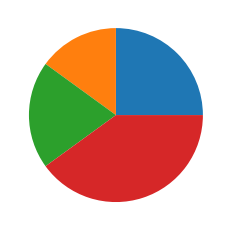

In [7]:
x = np.array([25, 15, 20, 40])
plt.pie(x);

Typically, you'll see examples where all of the values in the array `x` will sum to 100, but the data provided to the pie chart does NOT have to add up to 100. Any numbers provided will be normalized to `sum(x)==1` by default, although this can be turned off by setting `normalize=False`.

If you set `normalize=False` and the values of `x` do not sum to 1 AND are less than 1, a partial pie will be plotting. If the values sum to larger than 1, a `ValueError` will be raised.

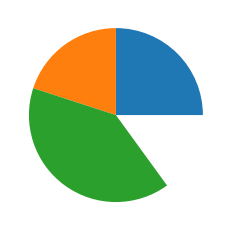

In [9]:
x = np.array([0.25, 0.20, 0.40])
plt.pie(x, normalize=False);

Let's do a more complicated example.

Here we create a pie chart with various sizes associated with each color. Labels are derived by capitalizing each color in the array `colors`.

More interesting is the `explode` input, which allows you to offset each wedge by a fraction of the radius. In this example, each wedge is not offset except for the pink (3rd index).

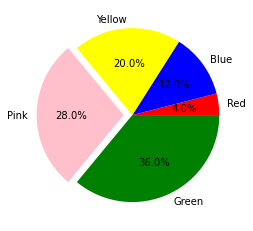

In [11]:
colors = ['red', 'blue', 'yellow', 'pink', 'green']
labels = [c.capitalize() for c in colors]

sizes = [1, 3, 5, 7, 9]
explode = (0, 0, 0, 0.1, 0)


plt.pie(sizes, labels=labels, explode=explode, colors=colors, autopct='%1.1f%%');

## Animation

From matplotlib's animation interface, there is one main tool, `FuncAnimation`. See matplotlib's full animation documentation [here](https://matplotlib.org/stable/api/animation_api.html).

In [7]:
from matplotlib.animation import FuncAnimation

`FuncAnimation` creates animations by repeatedly calling a function. Using this method involves three main steps:

1. Create an initial state of the plot
1. Make a function that can "progress" the plot to the next frame of the animation
1. Create the animation using FuncAnimation

For this example, let's create an animated sine wave.

### Step 1: Initial State
In the initial state step, we will define a function called `init` that will define the initial state of the animation plot. Note that this function is technically optional. An example later will omit this explicit initialization step. 

First, we'll define a figure and axes, then create a line with `plt.plot`. To create the initialization function, we set the line's data to be empty and then return the line.

Note that this cell will display empty axes in jupyter notebooks.

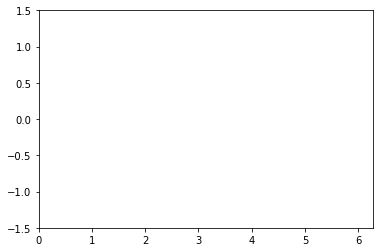

In [8]:
fig, ax = plt.subplots()
ax.set_xlim(0, 2 * np.pi)
ax.set_ylim(-1.5, 1.5)

(line,) = ax.plot([], [])


def init():
    line.set_data([], [])
    return (line,)

### Step 2: Animation Progression Function
For each frame in the animation, we need to create a function that takes an index and returns the desired frame in the animation. 

In [9]:
def animate(i):

    x = np.linspace(0, 2 * np.pi, 250)

    y = np.sin(2 * np.pi * (x - 0.1 * i))

    line.set_data(x, y)

    return (line,)

### Step 3: Using `FuncAnimation`
The last step is to feed the parts we created to `FuncAnimation`. Note that when using this function, it is important to save the output to a variable, even if you do not intent to use it later, because otherwise it is at risk of being collected by Python's garbage collector.

In [10]:
anim = FuncAnimation(fig, animate, init_func=init, frames=200, interval=20, blit=True)

To show the animation in this jupyter notebook, we need to set the rc parameter for animation to `html5`, instead of the default, which is none.

In [11]:
from matplotlib import rc

rc('animation', html='html5')

anim

### Saving an Animation

To save an animation, use `anim.save()` as shown below. The inputs are teh file location (`animate.gif`) and the writer used to save the file. Here the animation writer chosen is Pillow, a library for image processing in Python.

In [12]:
anim.save('animate.gif', writer='pillow');

---

## Summary
* `matplotlib` supports additional plot types. Here we covered histograms and scatter plots.
* You can animate your plots.


## What's Next
[More plotting functionality](additional-topics-2) such as annotations, equation rendering, and colormaps.

## Additional Resources
- [Plot Types Cheat Sheet](https://lnkd.in/dD5fE8V)
- [Matplotlib Documentation: Basic Pie Charts](https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html)
- [Matplotlib Documentation: Histograms](https://matplotlib.org/stable/gallery/statistics/hist.html)